# Importing the libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Merging the datasets of 12 months

In [2]:
files = [file for file in os.listdir('./data sets/')]

In [3]:
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
all_month_sales = pd.DataFrame()

In [5]:
for file in files:
    data = pd.read_csv('data sets/' + file)
    all_month_sales = pd.concat([all_month_sales,data])
    

### Read the concatenated data from a csv file

In [6]:
all_month_sales.to_csv('all_months.csv', index = False)

In [7]:
all_data = pd.read_csv('all_months.csv')

In [8]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Cleaning

#### Dropping NAN values for analysis

In [9]:
df_nan = all_data[all_data.isna().any(axis = 1)]

In [10]:
df_nan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
all_data = all_data.dropna(how = 'all')

In [12]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Removing values with Or in Months

In [13]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Augment Data with additional columns

#### Task 1: Add a month column

In [14]:
all_data['Months'] = all_data['Order Date'].str[0:2]

#### Task 2: Add Sales Column for each transaction

In [15]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')

In [16]:
all_data['Price Each'] = all_data['Price Each'].astype('float')

In [17]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [19]:
sales_per_month = all_data.groupby('Months').sum()['Sales']

#### 1.What was the best months for sale? How much was earned in that month?

In [20]:
months_series = pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [21]:
sales = [sales_per_month[i] for i in range(0,12)]

In [22]:
sales_series = pd.Series(sales)

In [23]:
sales_df = pd.DataFrame({'Months':months_series, 'Sales':sales_series})

In [24]:
sales_df

,Months,Sales
0,Jan,1.822257e+06
1,Feb,2.202022e+06
2,Mar,2.807100e+06
3,Apr,3.390670e+06
4,May,3.152607e+06
5,Jun,2.577802e+06
6,Jul,2.647776e+06
7,Aug,2.244468e+06
8,Sep,2.097560e+06
9,Oct,3.736727e+06


In [25]:
sales_df.to_csv('SalesPerMonth.csv')

### Visualiztion with Tableau

#### NOTE: PLEASE CLICK ON THE BOTTOM RIGHT CORNER OF THE VISUALIZATION FOR FULL SCREEN VIEW

In [26]:
%%html
<div class='tableauPlaceholder' id='viz1619896579133' style='position: relative'><noscript>
<a href='#'>
<img alt='Sales Per Month ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sa&#47;SalesPerMonth_16198965607370&#47;SalesPerMonth&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> 
<param name='site_root' value='' /><param name='name' value='SalesPerMonth_16198965607370&#47;SalesPerMonth' />
<param name='tabs' value='no' /><param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sa&#47;SalesPerMonth_16198965607370&#47;SalesPerMonth&#47;1.png' /> 
<param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>
<script type='text/javascript'> 
var divElement = document.getElementById('viz1619896579133');  
var vizElement = divElement.getElementsByTagName('object')[0]; 
vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';  
var scriptElement = document.createElement('script'); 
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';  
vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

### 2.Which is the city with the highest sale?

In [27]:
all_data.reset_index(drop= True, inplace=True)

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [29]:
cities = []
for i in range(0,len(all_data)):
    cities.append(all_data['Purchase Address'][i].split(',')[1])

In [30]:
cities = pd.Series(cities)

In [31]:
all_data['Cities'] = cities

In [32]:
sale_city = all_data.groupby('Cities').sum().sort_values('Sales',ascending=False)['Sales']

In [33]:
sale_city

Cities
 San Francisco    8.262204e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Boston           3.661642e+06
 Atlanta          2.795499e+06
 Dallas           2.767975e+06
 Seattle          2.747755e+06
 Portland         2.320491e+06
 Austin           1.819582e+06
Name: Sales, dtype: float64

In [34]:
sale_city.to_csv('Sale_city.csv')

### Visualiztion with Tableau

##### NOTE: PLEASE CLICK ON THE BOTTOM RIGHT CORNER OF THE VISUALIZATION FOR FULL SCREEN VIEW

In [35]:
%%html
<div class='tableauPlaceholder' id='viz1619981520512' style='position: relative'><noscript><a href='#'><img alt='Sale Per City ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;sa&#47;salespercity_16199038023800&#47;SalePerCity&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='salespercity_16199038023800&#47;SalePerCity' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;sa&#47;salespercity_16199038023800&#47;SalePerCity&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1619981520512');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 3.What time should we display our advertisements to maximize the likelihood of the customers buying our product?

In [36]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles


In [37]:
all_data['Order Date'] = pd.DatetimeIndex(all_data['Order Date'])

In [38]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [39]:
best_time = all_data.groupby(['Hour']).count()

In [40]:
best_time.to_csv('Best_time.csv')

### Visualiztion with Tableau

#### NOTE: PLEASE CLICK ON THE BOTTOM RIGHT CORNER OF THE VISUALIZATION FOR FULL SCREEN VIEW

In [41]:
%%html
<div class='tableauPlaceholder' id='viz1619992060428' style='position: relative'><noscript><a href='#'><img alt='Orders Per Hour ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Be&#47;BestSaleinhour&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='BestSaleinhour&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Be&#47;BestSaleinhour&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1619992060428');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 4. What products are most often sold together?

In [42]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [43]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,Hour,Minute
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,14,38
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles,19,42
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles,19,42
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston,11,31
...,...,...,...,...,...,...,...,...,...,...,...
185893,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,3.84,Atlanta,20,18
185904,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,11.99,Atlanta,0,25
185905,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,5.98,Atlanta,0,25
185941,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,600.00,San Francisco,13,49


In [44]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\alway\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,Hour,Minute,Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,14,38,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,14,38,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles,19,42,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles,19,42,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [46]:
df = df[['Order ID','Grouped']].drop_duplicates()


In [47]:
df.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [48]:
len(df.iloc[0][1].split(','))

2

In [49]:
df.iloc[0][1]

'Google Phone,Wired Headphones'

In [50]:
most_bought = []
for i in range(0, len(df)):
    if(len(df.iloc[i][1].split(',')) >= 2):
        most_bought.append(df.iloc[i][1])

In [51]:
most_bought

['Google Phone,Wired Headphones',
 'Google Phone,USB-C Charging Cable',
 'Bose SoundSport Headphones,Bose SoundSport Headphones',
 'AAA Batteries (4-pack),Google Phone',
 'Lightning Charging Cable,USB-C Charging Cable',
 'Apple Airpods Headphones,ThinkPad Laptop',
 'Bose SoundSport Headphones,AAA Batteries (4-pack)',
 '34in Ultrawide Monitor,Google Phone',
 'Lightning Charging Cable,USB-C Charging Cable',
 'iPhone,Lightning Charging Cable',
 'Google Phone,Bose SoundSport Headphones,Wired Headphones',
 'Google Phone,USB-C Charging Cable',
 'Google Phone,Wired Headphones',
 'Google Phone,Wired Headphones',
 'AAA Batteries (4-pack),27in FHD Monitor',
 'USB-C Charging Cable,AAA Batteries (4-pack)',
 'Google Phone,USB-C Charging Cable',
 'iPhone,Wired Headphones',
 'iPhone,Wired Headphones',
 'iPhone,27in 4K Gaming Monitor',
 'iPhone,Lightning Charging Cable',
 'ThinkPad Laptop,AAA Batteries (4-pack)',
 'iPhone,Apple Airpods Headphones,AAA Batteries (4-pack)',
 'iPhone,Lightning Charging Ca

# OR

In [52]:
from itertools import combinations
from collections import Counter


count = Counter()
for items in df['Grouped']:
    items_list = items.split(',')
    count.update(Counter(combinations(items_list,2)))

In [53]:
for key,values in count.most_common(20):
    print(key,values)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

### 5. What product was sold the most and why it was sold the most?

In [54]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,9,27


In [55]:
product_grouped = all_data.groupby('Product')

In [56]:
quantity_ordered = product_grouped.sum()['Quantity Ordered']

In [57]:
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

In [58]:
product = [product for product,df in product_grouped]

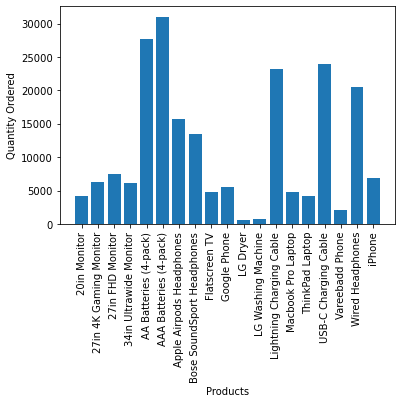

In [59]:
plt.bar(product,quantity_ordered)
plt.xticks(product, rotation = 'vertical')
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

In [60]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,9,27


In [61]:
prices = all_data.groupby('Product').mean()['Price Each']

In [68]:
type(prices)

pandas.core.series.Series

In [75]:
product = pd.Series(product)

In [87]:
quantity_ordered.reset_index()

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


In [100]:
product_ordered_price = pd.DataFrame({'Prices(Mean)':prices, 'Ordered': quantity_ordered})

In [101]:
product_ordered_price.sort_values('Ordered', ascending = False)

,Prices(Mean),Ordered
Product,,
AAA Batteries (4-pack),2.99,31017
AA Batteries (4-pack),3.84,27635
USB-C Charging Cable,11.95,23975
Lightning Charging Cable,14.95,23217
Wired Headphones,11.99,20557
Apple Airpods Headphones,150.00,15661
Bose SoundSport Headphones,99.99,13457
27in FHD Monitor,149.99,7550
iPhone,700.00,6849
